#### Regression Data; performance vs alpha (Figure 3 (left panel))
- data sets : 8, 16, 24 features
- number of images : 60K with 33% validation split
- learning rate : 0.01 (for 8 features)
- number of samples for stat error: 20
- unstable results after $\alpha$ > 0.6

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [2]:
val_loss_mean = {}

In [3]:
val_loss_mean["16ft"] = np.load("./RegResults_Final/val_loss_mean_16ft_da_60Kmin.npy")
val_loss_mean["8ft"] = np.load("./RegResults_Final/val_loss_mean_8ft_da_60Kmin.npy")
val_loss_mean["24ft"] = np.load("./RegResults_Final/val_loss_mean_24ft_da_60Kmin.npy")
val_loss_mean["16ft_err"] = np.load("./RegResults_Final/val_loss_err_16ft_da_60Kmin.npy")
val_loss_mean["8ft_err"] = np.load("./RegResults_Final/val_loss_err_8ft_da_60Kmin.npy")
val_loss_mean["24ft_err"] = np.load("./RegResults_Final/val_loss_err_24ft_da_60Kmin.npy")
val_loss_mean["alphas"] =  np.load("./RegResults_Final/alphas_16ft_60Kmin.npy")

In [4]:
val_loss_mean

{'16ft': array([0.01359962, 0.01531301, 0.01747468, 0.01821701, 0.02083097,
        0.02792123, 0.03142649, 0.03920362, 0.029341  , 0.02819142,
        0.04469888]),
 '8ft': array([0.00756299, 0.0078579 , 0.00923537, 0.01134649, 0.01296236,
        0.01396369, 0.01645338, 0.02030013, 0.02028948, 0.02109854,
        0.01368568]),
 '24ft': array([0.01709568, 0.01867241, 0.02150257, 0.02314854, 0.02971257,
        0.03694348, 0.04748297, 0.03721483, 0.02313301, 0.05336881,
        0.05475588]),
 '16ft_err': array([0.00055097, 0.00047319, 0.00077284, 0.00067607, 0.00083704,
        0.00140923, 0.00117037, 0.00202729, 0.00187522, 0.00228503,
        0.00295286]),
 '8ft_err': array([0.00032467, 0.00034226, 0.00044877, 0.00052958, 0.00064491,
        0.0008082 , 0.00079286, 0.00120989, 0.00112807, 0.00156879,
        0.00239279]),
 '24ft_err': array([0.00071692, 0.00070221, 0.00081326, 0.0008114 , 0.00132897,
        0.00142345, 0.00191921, 0.00231192, 0.00201471, 0.00339336,
        0.003780

In [5]:
end=4
yreg_16 = val_loss_mean["16ft"][:-end]
yreg_error_16 = val_loss_mean["16ft_err"][:-end]
yreg_8 = val_loss_mean["8ft"][:-end]
yreg_error_8 = val_loss_mean["8ft_err"][:-end]
yreg_24 = val_loss_mean["24ft"][:-end]
yreg_error_24 = val_loss_mean["24ft_err"][:-end]
alphas = val_loss_mean["alphas"][:-end]

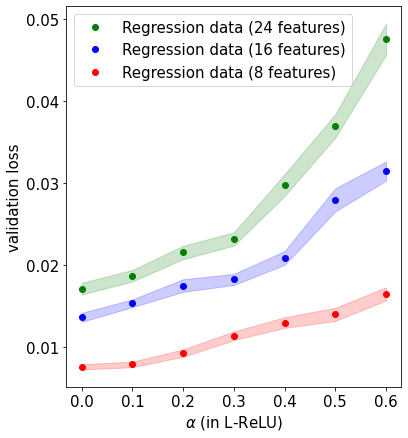

In [6]:
plt.rcParams["figure.figsize"] = (6,7)
plt.rcParams.update({'font.size': 15})
plt.plot(alphas, yreg_24, 'ko', label="Regression data (24 features)", color='g')
plt.fill_between(alphas, yreg_24-yreg_error_24, yreg_24+yreg_error_24, color='g', alpha=0.2)
plt.plot(alphas, yreg_16, 'ko', label="Regression data (16 features)", color='b')
plt.fill_between(alphas, yreg_16-yreg_error_16, yreg_16+yreg_error_16, color='b', alpha=0.2)
plt.plot(alphas, yreg_8, 'ko', label="Regression data (8 features)", color='r')
plt.fill_between(alphas, yreg_8-yreg_error_8, yreg_8+yreg_error_8, color='r', alpha=0.2)
plt.xlabel(r"$\alpha$ (in L-ReLU)")
plt.ylabel("validation loss")
plt.legend()
plt.savefig("./../PaperFigs/Regression_vs_alpha.png")